### importing necessary libraries

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### data preparation

In [138]:
df = pd.read_csv(r"C:\Users\preet\testing\Projects_to_upload_on_Github\Tech Industry Layoffs- A Comprehensive Analysis from COVID-19 to the Present\layoffs.csv")

In [139]:
df.head(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Just Eat,London,Food,1700.0,NaN,2023-03-21,Acquired,United Kingdom,NaN
1,Marvell,SF Bay Area,Hardware,320.0,0.04,2023-03-21,Post-IPO,United States,NaN
2,Workhuman,Dublin,HR,130.0,0.10,2023-03-21,Unknown,Ireland,131.0
3,FreshBooks,Toronto,Finance,80.0,0.10,2023-03-21,Unknown,Canada,331.0
4,Xing,Hamburg,HR,68.0,NaN,2023-03-21,Series A,Germany,NaN
5,Mr Yum,Melbourne,Food,40.0,NaN,2023-03-21,Series A,Australia,101.0
6,Smallcase,Bengaluru,Finance,15.0,0.04,2023-03-21,Series C,India,62.0
7,Laybuy,Auckland,Finance,NaN,0.10,2023-03-21,Post-IPO,New Zealand,130.0
8,Amazon,Seattle,Retail,9000.0,NaN,2023-03-20,Post-IPO,United States,108.0
9,Huuuge Games,Warsaw,Consumer,NaN,0.10,2023-03-20,Series C,Poland,57.0


In [140]:
df.tail(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
2404,Tuft & Needle,Phoenix,Retail,NaN,NaN,2020-03-19,Acquired,United States,0.0
2405,Flytedesk,Boulder,Marketing,4.0,0.20,2020-03-18,Seed,United States,4.0
2406,Inspirato,Denver,Travel,130.0,0.22,2020-03-16,Series C,United States,79.0
2407,Help.com,Austin,Support,16.0,1.00,2020-03-16,Seed,United States,6.0
2408,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,Seed,United States,5.1
2409,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
2410,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
2411,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
2412,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0
2413,Blackbaud,Charleston,Other,500.0,0.14,NaN,Post-IPO,United States,NaN


In [141]:
df.shape

(2414, 9)

In [142]:
df.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,1653.000000,1605.000000,2193.000000
mean,247.580157,0.257967,826.303828
std,828.240611,0.256444,5568.453605
min,3.000000,0.000000,0.000000
25%,36.000000,0.100000,50.000000
50%,80.000000,0.170000,157.000000
75%,180.000000,0.300000,447.000000
max,12000.000000,1.000000,121900.000000


In [143]:
df.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

In [144]:
# checking for missing values

df.isnull().sum()

company                  0
location                 0
industry                 2
total_laid_off         761
percentage_laid_off    809
date                     1
stage                    6
country                  0
funds_raised           221
dtype: int64

#### we can see a lot of missing values(NAN) in the 'total_laid_off' column, since no of Layoff per company is the important data and unique per company, we can't substitue it , let us fill those values with zeroes.

In [145]:
df.fillna(0,inplace = True)

In [146]:
df.head(15)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Just Eat,London,Food,1700.0,0.00,2023-03-21,Acquired,United Kingdom,0.0
1,Marvell,SF Bay Area,Hardware,320.0,0.04,2023-03-21,Post-IPO,United States,0.0
2,Workhuman,Dublin,HR,130.0,0.10,2023-03-21,Unknown,Ireland,131.0
3,FreshBooks,Toronto,Finance,80.0,0.10,2023-03-21,Unknown,Canada,331.0
4,Xing,Hamburg,HR,68.0,0.00,2023-03-21,Series A,Germany,0.0
5,Mr Yum,Melbourne,Food,40.0,0.00,2023-03-21,Series A,Australia,101.0
6,Smallcase,Bengaluru,Finance,15.0,0.04,2023-03-21,Series C,India,62.0
7,Laybuy,Auckland,Finance,0.0,0.10,2023-03-21,Post-IPO,New Zealand,130.0
8,Amazon,Seattle,Retail,9000.0,0.00,2023-03-20,Post-IPO,United States,108.0
9,Huuuge Games,Warsaw,Consumer,0.0,0.10,2023-03-20,Series C,Poland,57.0


In [147]:
df.isnull().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

### companies with high no of layoffs

In [148]:
top_companies = df.nlargest(10,'total_laid_off')

In [149]:
top_companies

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
334,Google,SF Bay Area,Consumer,12000.0,0.06,2023-01-20,Post-IPO,United States,26.0
806,Meta,SF Bay Area,Consumer,11000.0,0.13,2022-11-09,Post-IPO,United States,26000.0
23,Meta,SF Bay Area,Consumer,10000.0,0.00,2023-03-14,Post-IPO,United States,26000.0
367,Microsoft,Seattle,Other,10000.0,0.05,2023-01-18,Post-IPO,United States,1.0
738,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16,Post-IPO,United States,108.0
8,Amazon,Seattle,Retail,9000.0,0.00,2023-03-20,Post-IPO,United States,108.0
89,Ericsson,Stockholm,Other,8500.0,0.08,2023-02-24,Post-IPO,Sweden,663.0
507,Amazon,Seattle,Retail,8000.0,0.02,2023-01-04,Post-IPO,United States,108.0
508,Salesforce,SF Bay Area,Sales,8000.0,0.10,2023-01-04,Post-IPO,United States,65.0
200,Dell,Austin,Hardware,6650.0,0.05,2023-02-06,Post-IPO,United States,0.0


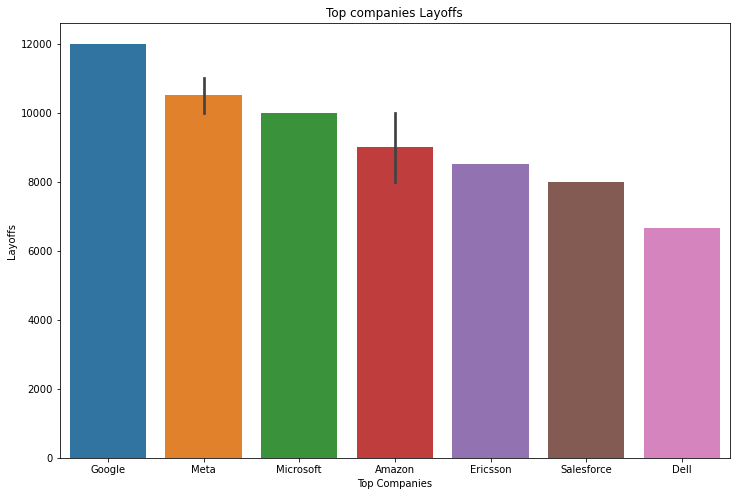

In [150]:
plt.figure(figsize = (12,8))
sns.barplot(x = top_companies.company, y = top_companies.total_laid_off)
plt.title('Top companies Layoffs')
plt.xlabel('Top Companies')
plt.ylabel('Layoffs')
plt.show();

### <><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><>><><><><><><><><><>><

In [151]:
df['country'].unique()

array(['United Kingdom', 'United States', 'Ireland', 'Canada', 'Germany',
       'Australia', 'India', 'New Zealand', 'Poland', 'Austria',
       'Indonesia', 'Japan', 'Nigeria', 'France', 'Brazil', 'Switzerland',
       'Israel', 'Sweden', 'South Korea', 'China', 'Italy', 'Singapore',
       'Estonia', 'Finland', 'Netherlands', 'Spain', 'Portugal', 'Chile',
       'Colombia', 'Argentina', 'Seychelles', 'Mexico', 'Egypt', 'Kenya',
       'Luxembourg', 'Greece', 'Norway', 'Belgium', 'Denmark',
       'Hong Kong', 'Malaysia', 'Hungary', 'Vietnam', 'Thailand',
       'Lithuania', 'Ghana', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Peru', 'Bahrain', 'Romania', 'Turkey',
       'Russia', 'Uruguay', 'Bulgaria', 'South Africa', 'Czech Republic',
       'Myanmar'], dtype=object)

### Indian companies and their layoffs (>1000)

In [152]:
indian_companies = df[df['country'] == 'India']

In [153]:
indian_companies.tail(5)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
2278,Acko,Mumbai,Finance,45.0,0.09,2020-04-01,Unknown,India,143.0
2310,FabHotels,New Delhi,Travel,80.0,0.20,2020-03-30,Series B,India,48.0
2324,TravelTriangle,Gurugram,Travel,250.0,0.50,2020-03-28,Series D,India,47.0
2351,Fareportal,Gurugram,Travel,200.0,0.00,2020-03-26,Unknown,India,0.0
2398,Bounce,Bengaluru,Transportation,120.0,0.00,2020-03-19,Series D,India,214.0


In [154]:
# number of indian companies whose layoffs exceed 1000

print(sum(indian_companies['total_laid_off']>1000))

7


In [155]:
indian_companies_layoffs_exceed_1000 = indian_companies[indian_companies.total_laid_off > 1000]
indian_companies_layoffs_exceed_1000

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
215,Byju's,Bengaluru,Education,1500.0,0.00,2023-02-02,Private Equity,India,5500.0
946,Byju's,Bengaluru,Education,2500.0,0.05,2022-10-12,Private Equity,India,5500.0
1769,Bytedance,Mumbai,Consumer,1800.0,0.00,2021-01-27,Unknown,India,7400.0
1778,WhiteHat Jr,Mumbai,Education,1800.0,0.00,2021-01-06,Acquired,India,11.0
1884,PaisaBazaar,Gurugram,Finance,1500.0,0.50,2020-06-16,Series G,India,496.0
1931,Ola,Bengaluru,Transportation,1400.0,0.35,2020-05-20,Series J,India,3800.0
1943,Swiggy,Bengaluru,Food,1100.0,0.14,2020-05-18,Series I,India,1600.0


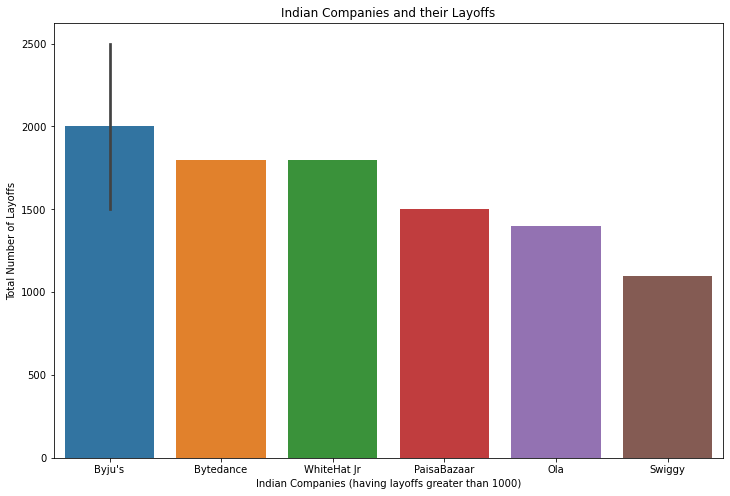

In [156]:
plt.figure(figsize = (12,8))
sns.barplot(x = indian_companies_layoffs_exceed_1000.company, y = indian_companies_layoffs_exceed_1000.total_laid_off)
plt.xlabel('Indian Companies (having layoffs greater than 1000)')
plt.ylabel('Total Number of Layoffs')
plt.title('Indian Companies and their Layoffs')
plt.show()

### <><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><>><><><><><><><><><>><

### Top Sectors by Layoffs

In [157]:
united_states_companies = df[df.country == 'United States']
united_states_companies.head(3)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1,Marvell,SF Bay Area,Hardware,320.0,0.04,2023-03-21,Post-IPO,United States,0.0
8,Amazon,Seattle,Retail,9000.0,0.00,2023-03-20,Post-IPO,United States,108.0
11,Candor Technology,Atlanta,Real Estate,0.0,0.00,2023-03-17,Unknown,United States,23.0


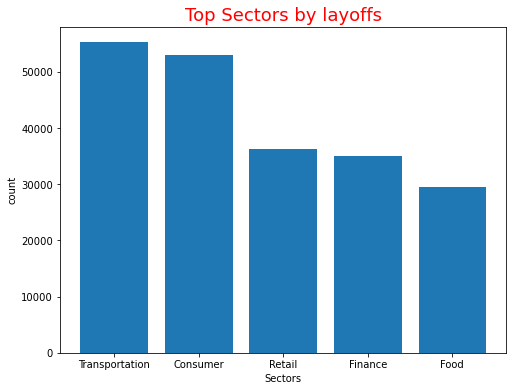

In [158]:
sectors = np.array(df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head())
name = np.array(['Transportation','Consumer','Retail','Finance','Food'])
plt.figure(figsize= (8 ,6))
plt.bar(name,sectors)
plt.xlabel('Sectors')
plt.ylabel('count')
plt.title('Top Sectors by layoffs',fontdict={'size':18,'color':'red'})
plt.show()

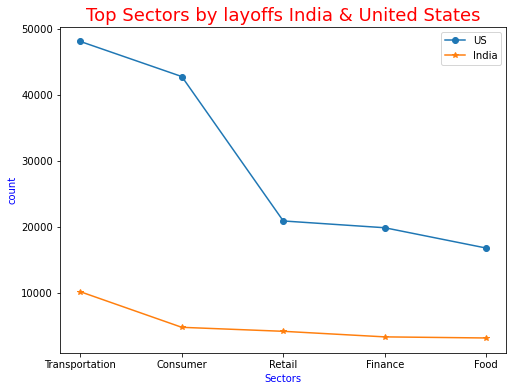

In [159]:
sector_us = np.array(united_states_companies.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head())
sector_ind = np.array(indian_companies.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head())
name = np.array(['Transportation','Consumer','Retail','Finance','Food'])
plt.figure(figsize= (8,6))
plt.plot(name,sector_us, marker = 'o',label = 'US')
plt.plot(name,sector_ind, marker = '*',label = 'India')
plt.xlabel('Sectors',fontdict = {'size':10,'color':'blue'})
plt.ylabel('count', fontdict = {'size':10, 'color':'blue'})
plt.title('Top Sectors by layoffs India & United States',fontdict={'size':18,'color':'red'})
plt.legend(['US','India'])
plt.show()

<Figure size 504x504 with 0 Axes>

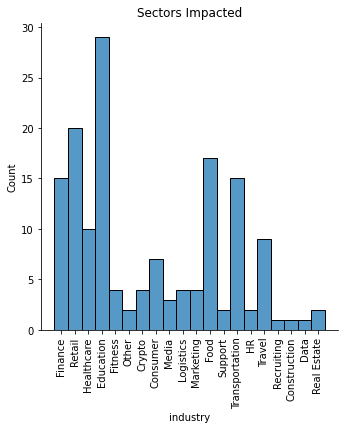

In [160]:
plt.figure(figsize=(7,7))
sns.displot(x=indian_companies['industry'], data=indian_companies)
plt.title('Sectors Impacted')
plt.xticks(rotation=90)
plt.show();

### <><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><>><><><><><><><><><>><

### Countries that are Mostly affected by layoffs :

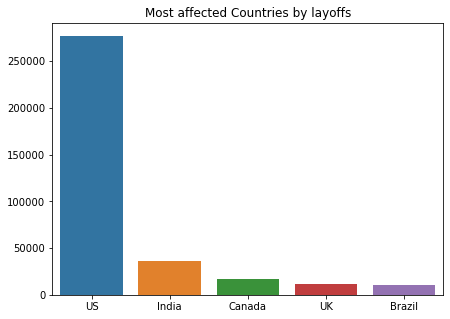

In [161]:
countries = np.array(df.groupby('country')['total_laid_off'].sum().sort_values(ascending = False).head())
name = np.array(['US','India','Canada','UK','Brazil'])
plt.figure(figsize = (7,5))
sns.barplot(x = name,y = countries, data = df)
plt.title("Most affected Countries by layoffs")
plt.show()

### <><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><>><><><><><><><><><>><

### Total number of Layoffs - Year wise

In [162]:
df_copy = df.copy()
df_copy.date.head()

0    2023-03-21
1    2023-03-21
2    2023-03-21
3    2023-03-21
4    2023-03-21
Name: date, dtype: object

In [163]:
# splitting the date column to date, month and year to get more insights

df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['year'] = df_copy['date'].dt.year
df_copy['day'] = df_copy['date'].dt.day
df_copy['month'] = df_copy['date'].dt.month

df_copy['year']=df_copy['year'].astype(int)
df_copy['month']=df_copy['month'].astype(int)
df_copy['day']=df_copy['day'].astype(int)
df_copy.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year,day,month
0,Just Eat,London,Food,1700.0,0.00,2023-03-21,Acquired,United Kingdom,0.0,2023,21,3
1,Marvell,SF Bay Area,Hardware,320.0,0.04,2023-03-21,Post-IPO,United States,0.0,2023,21,3
2,Workhuman,Dublin,HR,130.0,0.10,2023-03-21,Unknown,Ireland,131.0,2023,21,3
3,FreshBooks,Toronto,Finance,80.0,0.10,2023-03-21,Unknown,Canada,331.0,2023,21,3
4,Xing,Hamburg,HR,68.0,0.00,2023-03-21,Series A,Germany,0.0,2023,21,3


In [164]:
df_copy.year.unique()

array([2023, 2022, 2021, 2020, 1970])

In [165]:
df_copy['year'].value_counts()

2022    1215
2020     634
2023     520
2021      44
1970       1
Name: year, dtype: int64

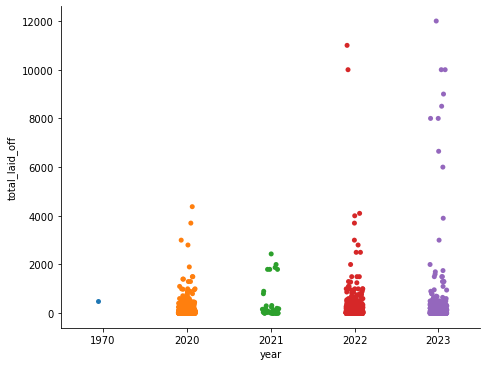

In [166]:
graph = sns.catplot(x = 'year',y = 'total_laid_off', data = df_copy)
graph.fig.set_figwidth(7)
graph.fig.set_figheight(5)

In [167]:
layoff_1970 = df_copy[df_copy['year']==1970]
layoff_2020 = df_copy[df_copy['year']==2020]
layoff_2021 = df_copy[df_copy['year']==2021]
layoff_2022 = df_copy[df_copy['year']==2022]
layoff_2023 = df_copy[df_copy['year']==2023]

In [168]:
print(layoff_1970.total_laid_off.sum())
print(layoff_2020.total_laid_off.sum())
print(layoff_2021.total_laid_off.sum())
print(layoff_2022.total_laid_off.sum())
print(layoff_2023.total_laid_off.sum())

500.0
80998.0
15823.0
161411.0
150518.0


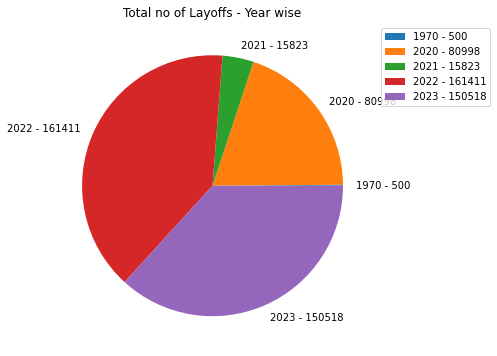

In [169]:
total_laid_off_2020 = int(layoff_2020['total_laid_off'].sum())
total_laid_off_2021 = int(layoff_2021['total_laid_off'].sum())
total_laid_off_2022 = int(layoff_2022['total_laid_off'].sum())
total_laid_off_2023 = int(layoff_2023['total_laid_off'].sum())
total_laid_off_1970 = int(layoff_1970['total_laid_off'].sum())

total_layoffs = (total_laid_off_1970,total_laid_off_2020,total_laid_off_2021,total_laid_off_2022,total_laid_off_2023)
labels = ['1970 - 500','2020 - 80998','2021 - 15823','2022 - 161411', '2023 - 150518']
plt.figure(figsize=(8,6))
plt.pie(total_layoffs, labels=labels,shadow=False)
plt.legend(labels=labels, bbox_to_anchor=(1,1))
plt.title('Total no of Layoffs - Year wise')
plt.show()

### <><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><>><><><><><><><><><>